In [71]:
%reload_ext line_profiler
%matplotlib inline
import matplotlib.pyplot as plt
# plt.set_cmap('viridis')

In [72]:
import sys
sys.path.insert(0, '../acrawler/')

In [73]:
from urllib.parse import urlsplit, unquote_plus

import numpy as np
import networkx as nx
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, SGDClassifier, PassiveAggressiveClassifier
from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer
from sklearn.feature_extraction import DictVectorizer 
from sklearn.pipeline import FeatureUnion, Pipeline, make_union, make_pipeline
from sklearn.preprocessing import FunctionTransformer, StandardScaler
from sklearn.metrics import classification_report, auc, precision_recall_curve, roc_auc_score, roc_curve
from sklearn.cross_validation import LabelKFold, cross_val_predict
from sklearn.externals import joblib

import requests
from parsel import Selector
from formasaurus.utils import get_domain, download

In [74]:
def get_informative_binary(vec, clf, N):
    clf_coef = clf.coef_[0]
    feature_names = vec.get_feature_names()
    topN = np.argsort(clf_coef)[-N:]
    bottomN = np.argsort(clf_coef)[:N]
    res = []

    for i in reversed(topN):
        coef = clf_coef[i]
        if coef > 0:
            res.append("+%0.4f: %s" % (coef, feature_names[i]))

    if (len(topN) >= N) or (len(bottomN) >= N):
        res.append("   ...")

    for i in reversed(bottomN):
        coef = clf_coef[i]
        if coef < 0:
            res.append("%0.4f: %s" % (coef, feature_names[i]))
            
    return res

In [85]:
!ls -lh ../acrawler/checkpoints/2016-02-11\ 20\:09\:07.311607

total 50848
-rw-r--r--  1 kmike  staff    13M Feb 11 20:19 classifiers-1455203951.joblib
-rw-r--r--  1 kmike  staff    12M Feb 11 20:19 crawl-1455203951.pickle.gz


In [77]:
r = joblib.load('../acrawler/checkpoints/2016-02-11 20:09:07.311607/classifiers-1455203951.joblib')

In [78]:
classifiers = r['clf']
vectorizer = r['vec']
(classifiers['login'].coef_ == classifiers['registration'].coef_).all()

False

In [79]:
from acrawler.links import extract_link_dicts

In [80]:
classifiers.keys()

dict_keys(['other', 'login', 'contact/comment', 'join mailing list', 'order/add to cart', 'search', 'registration', 'password/login recovery'])

In [81]:
url = 'http://www.macrumors.com/'
page = download(url)

In [84]:
links = list(extract_link_dicts(Selector(page), url))
X = vectorizer.transform(links)
links_and_probs = list(zip(links, classifiers['contact/comment'].predict_proba(X)[..., 1]))
links_and_probs.sort(key=lambda el: el[1], reverse=True)
for link, prob in links_and_probs:
    print(prob, link['url'],)

0.7568437902 https://www.evilsocket.net/2016/01/30/osx-mass-pwning-using-bettercap-and-the-sparkle-updater-vulnerability/
0.750045288822 http://forums.macrumors.com/threads/adonit-debuts-new-switch-mark-styluses.1955411/
0.742488924232 http://www.macrumors.com/2016/02/08/apple-retail-locations-in-india/
0.74010238256 http://www.macrumors.com/2016/02/08/pagare-smartstrap-contactless-payments-pebble-time/
0.730464691465 http://www.macrumors.com/2016/02/09/vr-coming-to-ios-within-2-years-munster/
0.71872236083 http://www.macrumors.com/2016/02/09/vr-coming-to-ios-within-2-years-munster/
0.714236896495 http://toucharcade.com/2016/02/11/space-grunts-review/
0.704359160851 http://forums.macrumors.com/threads/vr-coming-to-ios-within-2-years-munster.1955384/
0.704239606909 http://www.macrumors.com/2016/02/09/sparkle-hijacking-vulnerability/
0.702610780487 http://toucharcade.com/2016/02/10/call-of-commander-review/
0.701017798042 http://www.macrumors.com/2016/02/09/square-enixs-final-fantasy-ix-

<120x2097152 sparse matrix of type '<class 'numpy.float64'>'
	with 5037 stored elements in Compressed Sparse Row format>

In [195]:
login_clf = classifiers['search']
login_clf.

7343.3569947442502

In [86]:
# G_full = nx.read_gpickle('../acrawler/crawl-1454712509.pickle.gz')
G_full = nx.read_gpickle('../acrawler/checkpoints/2016-02-11 20:09:07.311607/crawl-1455203951.pickle.gz')

In [87]:
G_full.number_of_edges()

137517

In [88]:
G_full.node[100000]

{'ok': None,
 'predicted_scores': {'contact/comment': 0.51346520397488471,
  'join mailing list': 0.50216502057613743,
  'login': 0.46572870404254396,
  'order/add to cart': 0.44741334867610905,
  'other': 0.51256787615702559,
  'password/login recovery': 0.4562887351594816,
  'registration': 0.44737425512186813,
  'search': 0.67367134283223173},
 'response_id': None,
 'scores': None,
 'url': 'http://www.modaynovias.net/imagenes/2015/04/caries-3.jpg',
 'visited': False}

In [103]:
np.exp(-10)

4.5399929762484854e-05

In [96]:
G = [n for n_id, n in G_full.nodes_iter(data=True) if n['ok'] is None][:1000]
G

[{'ok': None,
  'predicted_scores': {},
  'response_id': None,
  'scores': None,
  'url': 'http://www.kemdetki.ru/users/244841/',
  'visited': False},
 {'ok': None,
  'predicted_scores': {},
  'response_id': None,
  'scores': None,
  'url': 'http://www.banner-netmarketing.de/cgi-bin/system/user.cgi',
  'visited': False},
 {'ok': None,
  'predicted_scores': {},
  'response_id': None,
  'scores': None,
  'url': 'http://www.banner-netmarketing.de/cgi-bin/system/page.cgi?p=agb',
  'visited': False},
 {'ok': None,
  'predicted_scores': {},
  'response_id': None,
  'scores': None,
  'url': 'http://www.banner-netmarketing.de/Suchmaschine/index.html',
  'visited': False},
 {'ok': None,
  'predicted_scores': {},
  'response_id': None,
  'scores': None,
  'url': 'http://www.banner-netmarketing.de/Sitemap/index.html',
  'visited': False},
 {'ok': None,
  'predicted_scores': {},
  'response_id': None,
  'scores': None,
  'url': 'http://www.banner-netmarketing.de/Werbung/index.html',
  'visited': F

In [91]:
pwd_nodes = [n for n_id, n in G_full.nodes_iter(data=True) 
             if n.get('predicted_scores', {}).get('registration', 0) > 0.6]

In [92]:
sorted(pwd_nodes, key=lambda n: n['response_id'] or 1e6)

[{'ok': None,
  'predicted_scores': {'contact/comment': 0.45162607523504605,
   'join mailing list': 0.51281542861818763,
   'login': 0.56526020788619491,
   'order/add to cart': 0.43672221010786766,
   'other': 0.5357948314822123,
   'password/login recovery': 0.43991010843445272,
   'registration': 0.60307285858078707,
   'search': 0.69446902119965259},
  'response_id': None,
  'scores': None,
  'url': 'http://www.photoforum.com.au/register.php?s=ff34fc9f69fc89f8bc6d2b34e8c12fe8',
  'visited': False},
 {'ok': None,
  'predicted_scores': {'contact/comment': 0.47544140246841482,
   'join mailing list': 0.47314701728023995,
   'login': 0.5421322924137274,
   'order/add to cart': 0.46048373320076813,
   'other': 0.48399217363462543,
   'password/login recovery': 0.45905375781903746,
   'registration': 0.68580726899878164,
   'search': 0.63032476512679814},
  'response_id': None,
  'scores': None,
  'url': 'http://pocketdentistry.com/register',
  'visited': False},
 {'ok': None,
  'predic

In [120]:
G = G_full.subgraph([n for n, attrs in G_full.node.items() if not attrs['visited'] and attrs['scores']])

In [5]:
G = G_full.subgraph([n for n, attrs in G_full.node.items() if attrs['visited'] and attrs['ok']])

In [155]:
import math

def binary_cross_entropy(yhat, y, eps=1e-8):
    return - y * math.log(yhat + eps) - (1 - y) * math.log(1 - yhat + eps)


def se(yhat, y):
    return (yhat - y) ** 2

binary_cross_entropy(0.9, 0.8), se(0.1, 0.95)

(0.5448054022361822, 0.7224999999999999)

In [132]:
G_full.node[68256]

{'ok': None,
 'scores': {'contact/comment': 0.49987500000260415,
  'join mailing list': 0.49987500000260415,
  'login': 0.49987500000260415,
  'order/add to cart': 0.49987500000260415,
  'other': 0.49987500000260415,
  'password/login recovery': 0.49987500000260415,
  'registration': 0.49987500000260415,
  'search': 0.50124999739583986},
 'url': 'http://www.lauraribas.com/en/',
 'visited': False}

In [122]:
# G.nodes(data=True)[30000:]

In [6]:
G.number_of_nodes()

46021

In [7]:
G.node[0]

{'ok': True,
 'scores': {'contact/comment': 0.010591206457632705,
  'join mailing list': 0.92339915174032317,
  'login': 0.0032728070833605858,
  'order/add to cart': 0.0067351272292617507,
  'other': 0.02014912659692731,
  'password/login recovery': 0.017651854714275307,
  'registration': 0.01257236202728053,
  'search': 0.96766171366300657},
 'url': 'http://www.lauraribas.com/',
 'visited': True}

In [8]:
def _score(attrs):
    try:
        return attrs['scores']['registration']
    except KeyError:
        return 0
    
    
# def get_node_Xy(G, node_id):
#     X = []
#     y = []
#     attrs = G.node[node_id]
#     reg_score = _score(attrs)
#     domain = get_domain(attrs['url'])

#     for next_id in G.successors_iter(node_id):
#         link_features = G.edge[node_id][next_id]['link']            
#         link_features['domain'] = domain

#         X.append(link_features)

#         target_reg_score = _score(G.node[next_id])
# #             y.append(target_reg_score)
#         y.append(max(0, target_reg_score-reg_score))
    

def get_Xy(G):
    X = []
    y = []
    for node_id, attrs in G.nodes_iter(data=True):
        reg_score = _score(attrs)
        domain = get_domain(attrs['url'])
        
        for next_id in G.successors_iter(node_id):
            link_features = G.edge[node_id][next_id]['link']            
            link_features['domain'] = domain
                
            X.append(link_features)

            target_reg_score = _score(G.node[next_id])
#             y.append(target_reg_score)
            y.append(max(0, target_reg_score-reg_score))
            
    return np.asarray(X), np.asarray(y)


def get_folds(X, n_folds):
    return LabelKFold(
        labels=[x['domain'] for x in X],
        n_folds=n_folds
    )

In [9]:
G.edge[69][72843]

{'link': {'attrs': {'href': 'http://www.lauraribas.com/configuracion-gmail/'},
  'before_text': 'Si usas Gmail,',
  'inside_text': 'aquí tienes una guía',
  'url': 'http://www.lauraribas.com/configuracion-gmail/'}}

In [10]:
X, y = get_Xy(G)

In [1391]:
G.

{'ok': True,
 'scores': {'contact/comment': 0.98013244394441967,
  'join mailing list': 0.92339915174032317,
  'login': 0.0032728070833605858,
  'order/add to cart': 0.0067351272292617507,
  'other': 0.02014912659692731,
  'password/login recovery': 0.017651854714275307,
  'registration': 0.01257236202728053,
  'search': 0.96766171366300657},
 'url': 'http://www.lauraribas.com/contacto/',
 'visited': True}

In [11]:
(y > 0.5).sum()

191

In [21]:
from formasaurus.text import normalize

def url_path_query(link):
    p = urlsplit(link['url'])
    return unquote_plus(p.path + '?' + p.query).lower()


def inside_text(link):
    text = link.get('inside_text', '')
    title = link['attrs'].get('title', '')
    return normalize(text + ' ' + title)


def before_text(link):
    return normalize(link.get('before_text', ''))


def get_vectorizer(hashing):
    
    # link url
    url_params = dict(
        preprocessor=url_path_query,
        analyzer='char',
        binary=True,
        ngram_range=(4,4),
    )
    if hashing:
        vec_url = HashingVectorizer(
            **url_params,
#             norm='l2',
            n_features=200000,
        )
    else:
        vec_url = CountVectorizer(
            **url_params,
#             min_df=2,
        )
        
    # link text
    text_params = dict(
        preprocessor=inside_text,
        analyzer='word',
        binary=True,
        ngram_range=(1,2),
    )
    if hashing:
        vec_text = HashingVectorizer(
            **text_params,
#             norm='l2',
            n_features=200000,
        )
    else:
        vec_text = CountVectorizer(
            **text_params,
#             min_df=2,
        )

    vec = FeatureUnion([
        ('url', vec_url),
        ('text', vec_text),
    #     ('before_text', CountVectorizer(
    #         preprocessor=before_text,
    #         analyzer='word',
    #         binary=True,
    #         ngram_range=(1,2),
    #         min_df=2,
    #     ))
    ])
    
    return vec

vec = get_vectorizer(hashing=True)

In [37]:
class PartialFitPipeline(Pipeline):
    """
    A Pipeline which supports partial_fit with stateless transformers.
    """

    def partial_fit(self, X, y=None, **fit_transform_params):
        """Call all the transforms one after the other to transform the
        data, then call partial_fit for the final estimator.

        Parameters
        ----------
        X : iterable
            Training data. Must fulfill input requirements of first step of the
            pipeline.
        y : iterable, default=None
            Training targets. Must fulfill label requirements for all steps of
            the pipeline.
        """

        # prepare
        params_steps = {step: {} for step, _ in self.steps}
        for pname, pval in fit_transform_params.items():
            step, param = pname.split('__', 1)
            params_steps[step][param] = pval

        # transform
        Xt = X
        for name, transform in self.steps[:-1]:
            Xt = transform.transform(Xt, **params_steps[name])

        # fit
        fit_params = params_steps[self.steps[-1][0]]
        self.steps[-1][-1].partial_fit(Xt, y, **fit_params)
        return self


In [50]:
# clf = LogisticRegression(C=1)
clf = SGDClassifier(
    loss='log',
#     penalty='elasticnet',
#     alpha=1e-6,
    n_iter=1,
    shuffle=False, 
    learning_rate='constant', 
    eta0=1e-0, 
    average=True,
#     class_weight='balanced',
    class_weight={False: 1.0, True: 10.0},
)

# clf = LogisticRegressionCV()
# clf = PassiveAggressiveClassifier(
#     n_iter=1,
#     shuffle=False,
#     loss='log',
# #     class_weight='balanced'
# )
model = PartialFitPipeline([
    ('vec', vec),
    ('clf', clf)
])

# model = make_pipeline(vec, clf)

In [62]:
m = vec.transform(X[:100])
m.data.nbytes
m.indices.nbytes + m.data.nbytes

32916

In [69]:
clf.classes_

array([False,  True], dtype=bool)

In [68]:
model.predict_proba(X[:1])[...,1]

array([ 0.26369624])

In [39]:
idx_train, idx_test = next(iter(get_folds(X, 3)))
_y = y >= 0.5
X_train, y_train = X[idx_train], _y[idx_train]
X_test, y_test = X[idx_test], _y[idx_test]

In [40]:
clf.partial_fit?

In [64]:
model.partial_fit(X_train[:10], y_train[:10], clf__classes=[True, False])

PartialFitPipeline(steps=[('vec', FeatureUnion(n_jobs=1,
       transformer_list=[('url', HashingVectorizer(analyzer='char', binary=True, decode_error='strict',
         dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
         lowercase=True, n_features=200000, ngram_range=(4, 4),
         non_negati..., penalty='l2', power_t=0.5,
       random_state=None, shuffle=False, verbose=0, warm_start=False))])

In [49]:
clf.coef_

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [48]:
model.named_steps['clf'].coef_.nonzero()

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([   902,   3333,   5766,  10379,  20728,  24050,  27635,  28075,
         28528,  31166,  31483,  31488,  33316,  36329,  36537,  37882,
         40795,  44168,  47575,  48965,  55633,  61913,  62397,  65014,
         66559,  72506,  73669,  78111,  81959,  85808,  86285,  90054,
         90624,  93392,  96322,  97002,  97955,  98074, 102076, 103812,
        104492, 117357, 120860, 122109, 122197, 126728, 130115, 133081,
        133346, 133713, 135761, 135849, 136205, 136714, 137859, 138740,
        139275, 144029, 145813, 147139, 151794, 153479, 153740, 153744,
        156856, 160012, 160881, 161611, 162940, 1634

In [25]:
model.partial_fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)

In [26]:
_y_prob = y_pred_proba[...,1]
# _y_prob = y[idx_test]

precision, recall, thresholds = precision_recall_curve(y_test, _y_prob)
fpr, tpr, thresholds = roc_curve(y_test, _y_prob)
roc_auc = auc(fpr, tpr)

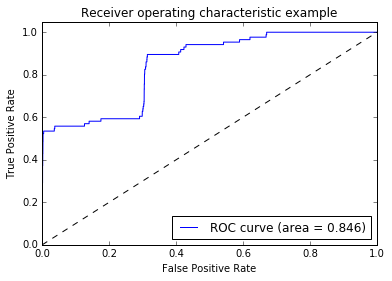

In [29]:
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

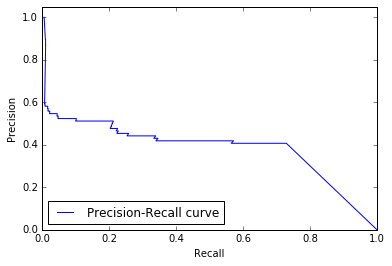

In [1380]:
plt.plot(precision, recall, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
# plt.title('Precision-Recall example: AUC={0:0.2f}'.format(average_precision[0]))
plt.legend(loc="lower left")
plt.show()

In [1381]:
y_pred = cross_val_predict(model, X, y >= 0.5, cv=get_folds(X, 5), n_jobs=-1)
print(classification_report(y >= 0.5, y_pred, digits=3))

             precision    recall  f1-score   support

      False      0.998     0.988     0.993     45019
       True      0.157     0.529     0.242       191

avg / total      0.994     0.986     0.990     45210



In [1371]:
clf.class_weight

{False: 1.0, True: 10.0}

In [1372]:
%%time
_y = y > 0.5
_sample_weight = np.abs(y*2 - 1)
model.fit(X, _y) #, sample_weight=_sample_weight)

CPU times: user 2.93 s, sys: 62.3 ms, total: 2.99 s
Wall time: 3.03 s


In [42]:
get_informative_binary(vec, clf, 100)

AttributeError: Transformer url does not provide get_feature_names.

In [140]:
def get_informative_features(vec, clf, class_labels, N):
    """
    Return text with features with the highest absolute coefficient
    values, per class.
    """
    feature_names = []
    for vec_name, vec in vectorizers:
        feature_names.extend(
            "%30s  %s" % (vec_name, name) for name in vec.get_feature_names()
        )
    features_by_class = []
    for i, class_label in enumerate(class_labels):
        topN = np.argsort(clf.coef_[i])[-N:]
        bottomN = np.argsort(clf.coef_[i])[:N]
        res = []

        for j in reversed(topN):
            coef = clf.coef_[i][j]
            if coef > 0:
                res.append("+%0.4f: %s" % (coef, feature_names[j]))

        if (len(topN) >= N) or (len(bottomN) >= N):
            res.append("   ...")

        for j in reversed(bottomN):
            coef = clf.coef_[i][j]
            if coef < 0:
                res.append("%0.4f: %s" % (coef, feature_names[j]))
        features_by_class.append((class_label, '\n'.join(res)))
    return features_by_class


def print_informative_features(features, clf, top, classes=None, class_map=None):
    vectorizers = [(name, vec) for (name, fe, vec) in features]
    feat_info = get_informative_features(vectorizers, clf, clf.classes_, top)
    for cls, report in feat_info:
        if classes is not None and cls not in classes:
            continue
        if class_map is not None:
            print(class_map[cls])
        else:
            print(cls)
        print(report)
        print("-"*80)

In [ ]:
print_informative_features()

In [97]:
G.edge[0][96]

{'link': {'attrs': {'class': 'sf-button large accent standard ',
   'href': 'http://www.lauraribas.com/training-14',
   'target': '_blank'},
  'before_text': '',
  'inside_text': 'Accede gratis al curso',
  'url': 'http://www.lauraribas.com/training-14'}}

In [98]:
vec.fit_transform([G.edge[0][96]['link'], G.edge[0][97]['link'], G.edge[0][95]['link']])

<3x68 sparse matrix of type '<class 'numpy.int64'>'
	with 68 stored elements in Compressed Sparse Row format>

In [95]:
vec.get_feature_names()

['url__-14?',
 'url__-leg',
 'url__-lega',
 'url__-mi/',
 'url__-mi/?',
 'url__/avi',
 'url__/avis',
 'url__/sob',
 'url__/sobr',
 'url__/tra',
 'url__/trai',
 'url__aini',
 'url__ainin',
 'url__al/?',
 'url__avis',
 'url__aviso',
 'url__bre-',
 'url__bre-m',
 'url__e-mi',
 'url__e-mi/',
 'url__egal',
 'url__egal/',
 'url__g-14',
 'url__g-14?',
 'url__gal/',
 'url__gal/?',
 'url__ing-',
 'url__ing-1',
 'url__inin',
 'url__ining',
 'url__iso-',
 'url__iso-l',
 'url__lega',
 'url__legal',
 'url__mi/?',
 'url__ng-1',
 'url__ng-14',
 'url__ning',
 'url__ning-',
 'url__o-le',
 'url__o-leg',
 'url__obre',
 'url__obre-',
 'url__rain',
 'url__raini',
 'url__re-m',
 'url__re-mi',
 'url__so-l',
 'url__so-le',
 'url__sobr',
 'url__sobre',
 'url__trai',
 'url__train',
 'url__viso',
 'url__viso-',
 'text__Accede',
 'text__Accede gratis',
 'text__Aviso',
 'text__Aviso legal',
 'text__Sobre',
 'text__Sobre mí',
 'text__al',
 'text__al curso',
 'text__curso',
 'text__gratis',
 'text__gratis al',
 'tex

In [22]:
G.node[143168]

{'ok': True,
 'scores': {'contact/comment': 0.97095307999964531,
  'join mailing list': 0.92339915174032317,
  'login': 0.0032728070833605858,
  'order/add to cart': 0.0067351272292617507,
  'other': 0.02014912659692731,
  'password/login recovery': 0.017651854714275307,
  'registration': 0.01257236202728053,
  'search': 0.96766171366300657},
 'url': 'http://www.lauraribas.com/mentalidad-fija-vs-mentalidad-de-crecimiento/',
 'visited': True}

In [8]:
next(G.nodes_iter(data=True))

(0,
 {'ok': True,
  'scores': {'contact/comment': 0.010591206457632705,
   'join mailing list': 0.92339915174032317,
   'login': 0.0032728070833605858,
   'order/add to cart': 0.0067351272292617507,
   'other': 0.02014912659692731,
   'password/login recovery': 0.017651854714275307,
   'registration': 0.01257236202728053,
   'search': 0.96766171366300657},
  'url': 'http://www.lauraribas.com/',
  'visited': True})

In [62]:
[(node_id, attr) for node_id, attr in G.nodes(data=True) if attr['visited']]

[(0,
  {'ok': True,
   'scores': {'contact/comment': 0.010591206457632705,
    'join mailing list': 0.92339915174032317,
    'login': 0.0032728070833605858,
    'order/add to cart': 0.0067351272292617507,
    'other': 0.02014912659692731,
    'password/login recovery': 0.017651854714275307,
    'registration': 0.01257236202728053,
    'search': 0.96766171366300657},
   'url': 'http://www.lauraribas.com/',
   'visited': True}),
 (1,
  {'ok': True,
   'scores': {},
   'url': 'http://www.lauraribas.com/training-14',
   'visited': True}),
 (2,
  {'ok': True,
   'scores': {},
   'url': 'http://cursos.lauraribas.com/',
   'visited': True}),
 (3,
  {'ok': True,
   'scores': {'contact/comment': 0.81619123359756551,
    'join mailing list': 0.92339915174032317,
    'login': 0.0032728070833605858,
    'order/add to cart': 0.0067351272292617507,
    'other': 0.02014912659692731,
    'password/login recovery': 0.017651854714275307,
    'registration': 0.056586274964906348,
    'search': 0.96766171

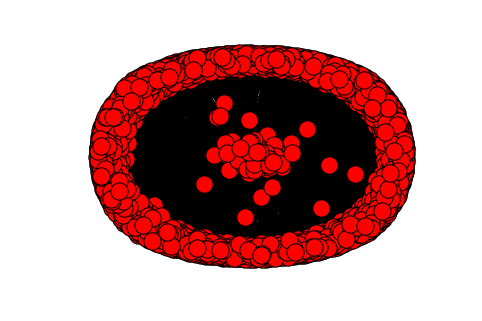

In [50]:
nx.draw(G, pos=nx.spring_layout(G))

In [33]:
G.node[0]['x'] = 5

In [34]:
G.nodes(data=True)

[(0, {'x': 5, 'y': 2}), (1, {'x': 10, 'y': 2})]

In [35]:
G.node[0]

{'x': 5, 'y': 2}

In [36]:
G.add_node(1, x=2)

In [37]:
G.nodes(data=True)

[(0, {'x': 5, 'y': 2}), (1, {'x': 2, 'y': 2})]